In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from importlib import reload 

#add simulator to a path
sys.path.append('../Simulator/')


import noise_models as nm

reload(nm)
%load_ext autoreload
%autoreload 2   

SHOT_TIME =1e4

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


dupa


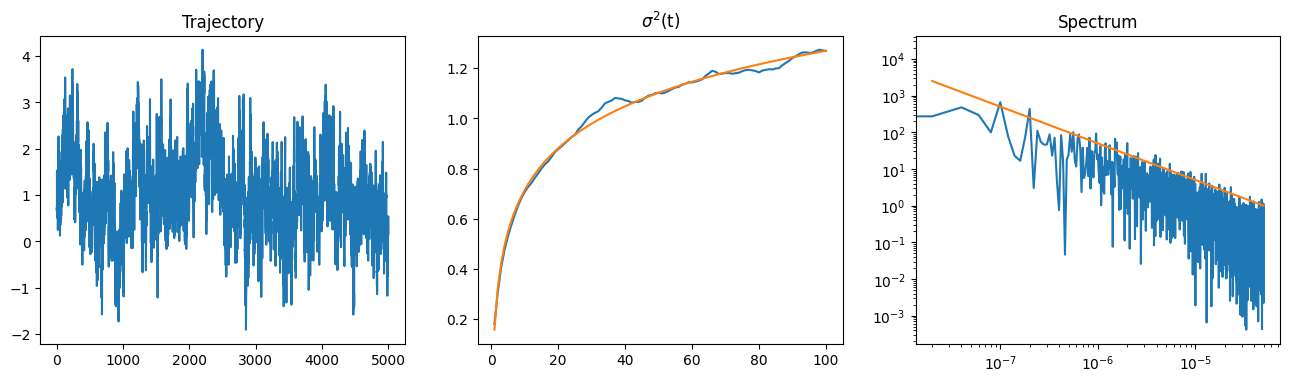

In [14]:
# Noise definition
ommin = 1/1e9
ommax = 1/1e4
N_FLUCTUATORS = 50
noise = nm.Over_f_noise(n_fluctuators = N_FLUCTUATORS, S1  = 0.25,
                        couplings_dispersion = 1e-99, 
                        ommax = ommax , 
                        ommin = ommin, 
                        om0 = 0,
                        fluctuator_class = nm.OrnsteinUhlenbeck)

noise.get_abc(SHOT_TIME)  #get the adaptive prior


In [36]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w
times = np.arange(0,1000)
y = noise.gen_trajectory(times*SHOT_TIME    )
yavg = moving_average(y, 10)
ydif = y-yavg

In [37]:
f, Savg = nm.get_spectrum(yavg, SHOT_TIME, times*SHOT_TIME)
f, S = nm.get_spectrum(y, SHOT_TIME, times*SHOT_TIME)
f, Sdif = nm.get_spectrum(ydif, SHOT_TIME, times*SHOT_TIME)


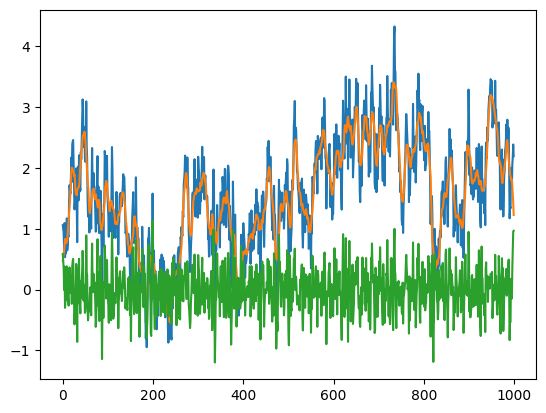

In [38]:
plt.plot(y)
plt.plot(yavg)
plt.plot(ydif)

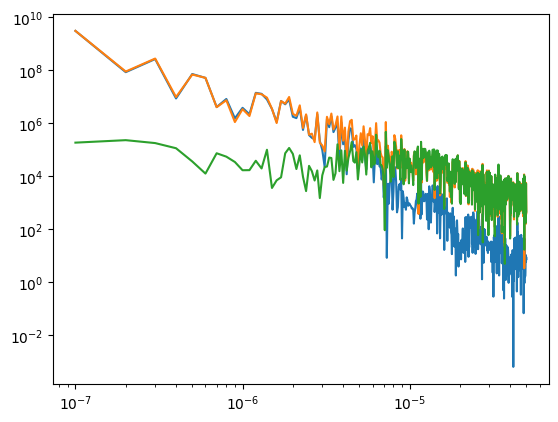

In [39]:
plt.plot(f, Savg)
plt.plot(f, S)
plt.plot(f, Sdif)
plt.yscale('log')
plt.xscale('log')